## The Microsoft Scifi Project - A&J Analytica

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They also want to capture a niche and create only sci-fi movies. They have hired A&J Analytica to help them better understand the scifi genre. Your team is charged with doing data analysis and creating a presentation that explores what type of sci-fi films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

## Checklist:

- Organization/Code Cleanliness

     Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.
     
     
- Visualizations & EDA

    Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
    
    You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.
    
     Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
   


- Questions:


In [154]:
#import packages needed

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
import seaborn as sns
%matplotlib inline

In [5]:
#merging data from TMDB API dataset and Movie Mojo webscraped dataset
#cleaning merged data by dropping unneeded columns & renaming columns

df1=pd.read_csv('mdbv2.csv',index_col=0)
df2=pd.read_csv('movie_subgenres.csv',index_col=0)
df1.reset_index(inplace=True)
df1.rename(columns={'title':'Title'},inplace=True)
sci_fi_df=pd.merge(df1,df2,on='Title')
sci_fi_df.rename(columns={'Lifetime_Gross': 'Revenue'},inplace=True)
sci_fi_df.rename(columns={'popularity': 'Popularity','vote_count':'Vote_Count', 
                          'vote_average': 'Vote_Average','release_date':'Release_Date'},inplace=True)
sci_fi_df.rename(columns={'genre':'Genre'},inplace=True)
sci_fi_df.drop(['mdb_id','Date_Released'],axis=1, inplace=True)
ratings_df=pd.read_csv('Ratings.csv')

In [8]:
#merging third dataset from OMDB for movie ratings
scifi_df=pd.merge(ratings_df,sci_fi_df,on='Title') 
scifi_df.columns

Index(['Unnamed: 0', 'Title', 'Rating', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Release_Date', 'Genre', 'Revenue', 'Subgenre'],
      dtype='object')

In [9]:
#cleaning full DF, dropping extra column
scifi_df.drop(columns='Unnamed: 0',inplace=True)


In [10]:
scifi_df #final DF with all three datasets merged 

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
0,Sunshine,R,23.118,2228,7.0,2007-04-05,sci-fi,3675753,Future
1,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Robot
2,Prometheus,R,31.760,8222,6.4,2012-05-30,sci-fi,126477084,Future
3,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,154696080,Superhero
4,Fantastic Four,PG-13,29.840,6401,5.7,2005-06-29,sci-fi,56117548,Superhero
...,...,...,...,...,...,...,...,...,...
283,Hellboy,PG-13,23.477,1722,5.3,2019-04-10,sci-fi,59623958,Superhero
284,The Incredible Hulk,PG-13,39.485,7322,6.2,2008-06-12,sci-fi,134806913,Superhero
285,Arrival,PG-13,36.084,11913,7.5,2016-11-10,sci-fi,100546139,Alien_Invasion
286,The Host,PG-13,13.322,3085,6.3,2013-03-22,sci-fi,26627201,Alien_Invasion


### What is the title and subgenre of the sci-fi film with the highest generated revenue? How does this compare to the highest rated movie (using popularity score)? 

Highest Revenue: Avengers: Endgame, Supernatural


Highest Popularity Sco: Spider-Man: Far From Home, Supernatural

In [207]:
#return movie details for highest generated revenue
#return movie details for higest rated by vote average

scifi_df.sort_values(by='Revenue',ascending=False).head(1)
scifi_df.sort_values(by='Popularity',ascending=False).head(1)

,Title,Rating,Popularity,Vote_Count,Vote_Average,Release_Date,Genre,Revenue,Subgenre
7,Spider-Man: Far from Home,PG-13,91.951,6800,7.5,2019-06-28,sci-fi,390532085,Supernatural


What scifi film has the lowest generated revenue?

In [ ]:
#code to do stuff -jude , also add lowest rated movie

sci_fi_df.sort_values(by='Revenue',ascending=True).head(1)['Title']

### What does the average popularity score look like by subgenre? 

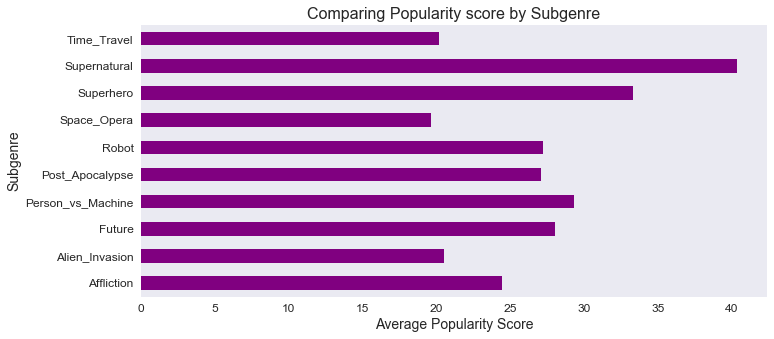

In [160]:
#plots each subgenre's average popularity score in a horizontal bar graph
#use of bar plot allows subgenres to be compared 

Avg_pop_by_sub=scifi_df.groupby('Subgenre')['Popularity'].mean()
Fig1=Avg_pop_by_sub.plot(kind='barh',figsize=(10,5),grid=False,color='purple')
Fig1.set_title('Comparing Popularity score by Subgenre',fontdict={'size':16})
Fig1.set_xlabel('Average Popularity Score',fontdict={'size':14})
Fig1.set_ylabel('Subgenre',fontdict={'size':14})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### How does each subgenre's average revenue compare? 

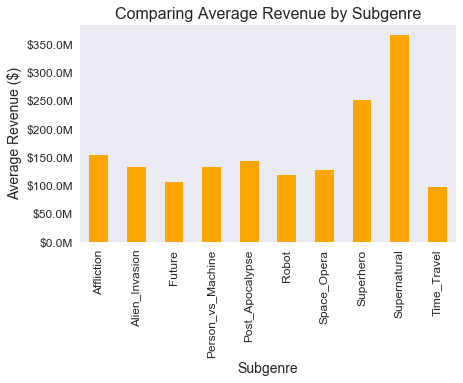

In [161]:
#plots each subgenre's revenue average in a vertical bar graph

from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    #'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

Avg_rev_by_sub=scifi_df.groupby('Subgenre')['Revenue'].mean()
Fig2=Avg_rev_by_sub.plot(kind='bar',grid=False,color='orange')
Fig2.set_title('Comparing Average Revenue by Subgenre',fontdict={'size':16})
Fig2.set_xlabel('Subgenre',fontdict={'size':14})
Fig2.set_ylabel('Average Revenue ($)',fontdict={'size':14})
Fig2.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Relationship and Correlation

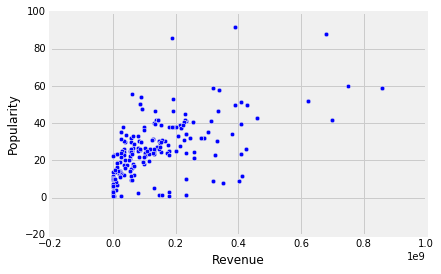

In [15]:
#What is the correlation of revenue and popularity? -Jude
#Popularity has a higher correlation with revenue 

sci_fi_df.plot(kind='scatter',x='Revenue',y='Popularity')
plt.show()

In [17]:
#Correlation between Revenue and Popularity -Jude

sci_fi_df['Revenue'].corr(sci_fi_df['Popularity'])

0.58841133208579954

### What are the Top 10 highest grossing Sci-Fi Movies? What is the distribution of ratings across the Top 10?

In [206]:
#top 10 sci-fi movies determined by revenue 

top_10=scifi_df.drop_duplicates(subset='Title',inplace=False).sort_values(by='Revenue',ascending=False).head(10)
top_10_df=pd.DataFrame(top_10['Title'])
top_10_df.reset_index(inplace=True,drop=True)
top_10_df

,Title
0,Avengers: Endgame
1,Avatar
2,Black Panther
3,Avengers: Infinity War
4,The Avengers
5,Avengers: Age of Ultron
6,Captain Marvel
7,The Hunger Games: Catching Fire
8,Wonder Woman
9,Iron Man 3


In [198]:
#this shows the distribution of rating across the top 10
top_10['Rating'].value_counts()

PG-13    10
Name: Rating, dtype: int64

In [ ]:
#What is the distribution like? <-Jude 

In [ ]:
#Are there any outliers? <-Jude 


## Final Thoughts & Summary:

In [ ]:
#Overall suggestion and final thoughts to Microsoft?
